# <img style="float: left; padding-right: 10px; width: 45px"> GEC AI HUB: Introduction to Data Science and Machine Learning



## Lab 3:  Gradient Boosting and BackPropagation -- Part 2

**GEC AI Hub**<br>
**Summer 2019**<br>
**Instructors:** Pavlos Protopapas<br>
**Lab Instructors:** Patrick Ohiomoba and Esteban Reyes<br>

---

In [8]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Learning Goals
In this lab, we'll continue our exploration of tree based models and ensembles in order to solve problems of classification and regression by learning about boosting and the Gradient Boosting Trees class of Algorithms.

By the end of this lab, you should:

- Be familiar with the mechanism of gradient boosting
- Be familiar with the `sklearn` implementations of Adaboost and Gradient Boosting Trees
- Be familiar with XGBoost
 

In [9]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.datasets import make_blobs

# models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# helpers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Ensembles of Estimators: Gradient Boosting

In the first part of this lab we learned about Gradient Boosting and implemented the model on a regression data set.  We'll now use Gradient Boosting on a classification data set as well as explore AdaBoost, a variant of the family of Gradient Boosting algorithms.

Recall that the idea behind boosting is that we will use a bunch of weak learners and fit sequentially. We fit the first learner on the signal of our data, the second learner on the first residual, the third on the second residual and so on. At each stage we upweight the places that our previous learner did badly on.


As usual we want to use an artificial dataset.  Let's again use one we generated from a previous lab.  We'll construct a set of clustered feature data in 4 classes labelled accordingly.

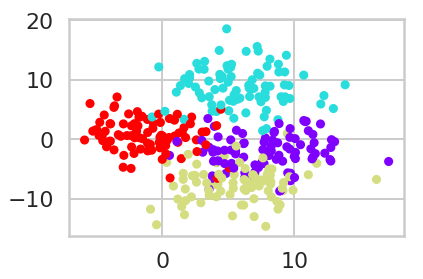

In [10]:
X1, y1 = make_blobs(n_samples=350, centers=4,
                  random_state=3012, cluster_std=3.0)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='rainbow');

Let's repeat our progression for the first part of the lab but this time with an eye towards classification.  We'll take advantage of our code from before allowing us to visualize the decision boundaries for a model.

In [11]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

**Exercise**:  Let's choose a weak learner to fit this data.  Choose Decision Trees with max-depth = 1 and 2 and fit them against our artificial dataset.  Create a plot overlaying the results of the fitted model on a scatter plot of the data

In [12]:
## Your code here

/home/igodo/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
No handles with labels found to put in legend.


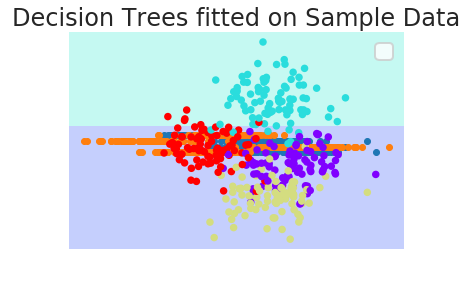

In [14]:
with sns.plotting_context('poster'):
    plt.plot(X1,y1,'.')

    dt_model = DecisionTreeClassifier(max_depth=1)
    dt_model.fit(X1, y1)
        
    visualize_classifier(dt_model, X1, y1)    
    plt.title("Decision Trees fitted on Sample Data")
    plt.legend();

NameError: name 'X' is not defined

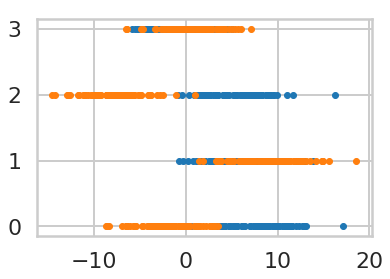

In [15]:
with sns.plotting_context('poster'):
    plt.plot(X1,y1,'.')

    dt_model = DecisionTreeClassifier(max_depth=2)
    dt_model.fit(X1, y1)
        
    visualize_classifier(dt_model, X, y)    
    plt.title("Decision Trees fitted on Sample Data")
    plt.legend();

So it's clear that our weak learners don't do a great job of fitting the data.  These models have very little predictive power and severely underfit our data.  They're not even powerful enough to represent all the classes?  What happens if we create a random forest with our underfit models?

**Exercise**:  Create a random forest model that's an ensembler of Decision Trees with max-depth=1.  Fit this random forest model against our data and create a plot overlaying the results of the fitted model on a scatter plot of the data

In [16]:
## Your code here

/home/igodo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/igodo/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


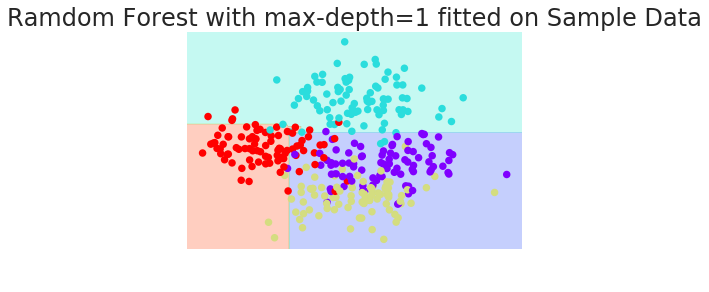

In [19]:
with sns.plotting_context('poster'):
    
    rf_model = RandomForestClassifier(max_depth=1)
    rf_model.fit(X1, y1)

    visualize_classifier(rf_model, X1, y1)    

    plt.title("Ramdom Forest with max-depth=1 fitted on Sample Data")

**Key Insight** -- The Random Forest models as an ensemble are again not performing significantly better than the individual Decision Tree models upon which they're based.  The idea behind bagging based models is that the learners they're base are overfit, and we use bagging ensembles as a way to combat that.  That idea still applies when we're doing classification

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

### Gradient boosted Tree for Classification

/home/igodo/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


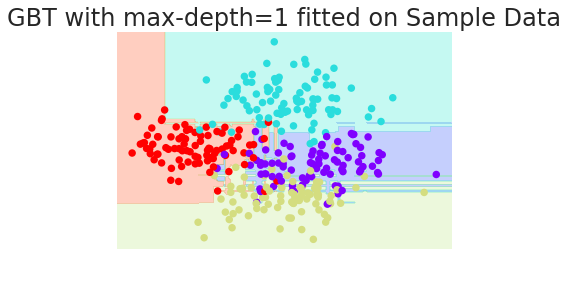

In [22]:
with sns.plotting_context('poster'):
    
    gb_model = GradientBoostingClassifier(n_estimators=400, max_depth=1, learning_rate=1)
    gb_model.fit(X1, y1)

    visualize_classifier(gb_model, X1, y1)    
    plt.title("GBT with max-depth=1 fitted on Sample Data")


As with regression, even with very weak learners we get good performance with even weak learners.  Let's explore some different implementations of Gradient Boosting and characterize the performance.

**Exercise**:  Generate a labelled classification dataset with four classes and 1000 points.  Use a random_state of 3012.

In [23]:
## Your code here

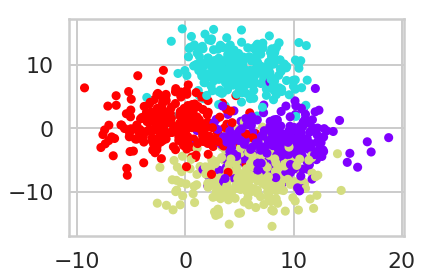

In [25]:
X2, y2 = make_blobs(n_samples=1000, centers=4,
                  random_state=3012, cluster_std=3.0)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='rainbow');

The first implememntation we'll be working with is Adaboost.  We'll be using the Adaboost classifier from sklearn.ensembles.

In [26]:
from sklearn.ensemble import AdaBoostClassifier

Before we do any implementation though, let's split our dataset into a training set and a test set using sklearn.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3) # 70% training and 30% test

We'll hold out our test set to do a final evaluation of our model.  For everything else we'll use our training set. 

### Adaboost for Classification

Adaboost takes similar parameters to the GradientBoostingRegressor and GradientBoostingClassifier models that we've already worked with.  So we can use an Adaboost to model our data seamlessly using similar parameters to our Gradient Boosting Classifier.  The main difference is that Adaboost can take any base estimator, so you should pass in the base estimator you'd like.

**Exercise**:  Create an Adaboost model with 500 estimators, a tree-depth of 1 and a learning rate of 1.  Create another Adaboost models with 5 estimators (but learning rate and tree-depth the same).  Visualize the resulting models on your data.

In [28]:
## Your code here

/home/igodo/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


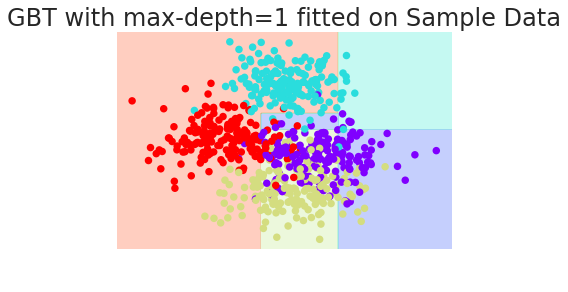

In [29]:
with sns.plotting_context('poster'):
    
    dt_model = DecisionTreeClassifier(max_depth=1)
    ada_model1 = AdaBoostClassifier(base_estimator=dt_model, n_estimators=1000, learning_rate=1)
    ada_model1.fit(X_train, y_train)

    visualize_classifier(ada_model1, X_train, y_train)    
    plt.title("GBT with max-depth=1 fitted on Sample Data")


/home/igodo/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


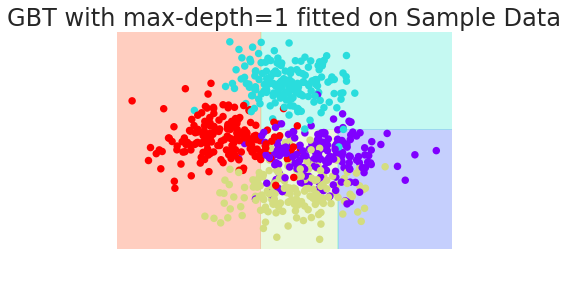

In [30]:
with sns.plotting_context('poster'):
    
    dt_model = DecisionTreeClassifier(max_depth=1)
    ada_model2 = AdaBoostClassifier(base_estimator=dt_model, n_estimators=5, learning_rate=1)
    ada_model2.fit(X_train, y_train)

    visualize_classifier(ada_model2, X_train, y_train)    
    plt.title("GBT with max-depth=1 fitted on Sample Data")


**Exercise**:  What is the accuracy score of your two Adaboost models on the training and test sets?

In [31]:
## Your code here

In [32]:
ada_model1.score(X_train,y_train)

0.48142857142857143

In [33]:
ada_model1.score(X_test,y_test)

0.5366666666666666

In [34]:
ada_model2.score(X_train,y_train)

0.6628571428571428

In [35]:
ada_model2.score(X_test,y_test)

0.7066666666666667

**Exercise**:  Create an Gradient Boosting Tree Classifier model with 500 estimators, a tree-depth of 1 and a learning rate of 1.  Create another model with 5 estimators (but learning rate and tree-depth the same).  Visualize the resulting models on your data.

In [36]:
## Your code here

/home/igodo/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


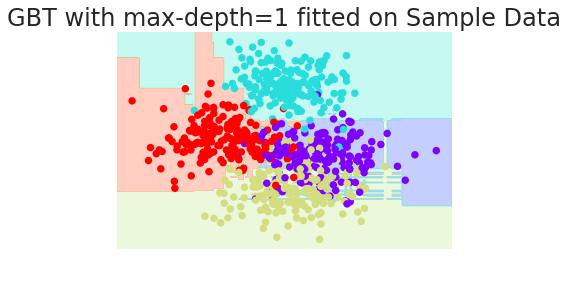

In [37]:
with sns.plotting_context('poster'):
    
    gbt_model1 = GradientBoostingClassifier(max_depth=1, n_estimators=1000, learning_rate=1)
    gbt_model1.fit(X_train, y_train)

    visualize_classifier(gbt_model1, X_train, y_train)    
    plt.title("GBT with max-depth=1 fitted on Sample Data")


/home/igodo/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


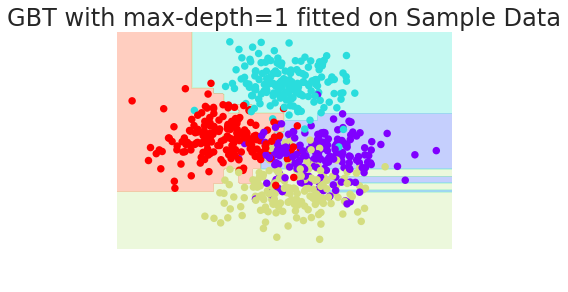

In [38]:
with sns.plotting_context('poster'):
    
    gbt_model2 = GradientBoostingClassifier(max_depth=1, n_estimators=10, learning_rate=1)
    gbt_model2.fit(X_train, y_train)

    visualize_classifier(gbt_model2, X_train, y_train)    
    plt.title("GBT with max-depth=1 fitted on Sample Data")


**Exercise**:  Let's find the ideal number of estimators for Adaboost and Gradient Boosted Tree Classifiers by looking at performance on the test and training sets. Use a learning rate of 1.

In [39]:
## Your code here

In [45]:
ada_scores_train = []
ada_scores_test = []

gbt_scores_train = []
gbt_scores_test = []

for i in np.arange(100, 3010, 100):
    gbt_model = GradientBoostingClassifier(max_depth=1, n_estimators=i, learning_rate=1)
    gbt_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(base_estimator=dt_model, n_estimators=i, learning_rate=1)
    ada_model.fit(X_train, y_train)
    
    ada_scores_train.append(ada_model.score(X_train, y_train))
    gbt_scores_train.append(gbt_model.score(X_train, y_train))
    

    ada_scores_test.append(ada_model.score(X_test, y_test))
    gbt_scores_test.append(gbt_model.score(X_test, y_test))
    

In [42]:
ada_scores_test

[0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666,
 0.5366666666666666]

In [43]:
i

1900

In [44]:
ada_scores_train

[0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143,
 0.48142857142857143]